# Data analytics with `pandas` and `matplotlib`

In this task, you are asked to analyze cryptocurrency data using the pandas and matplotlib libraries.
The task looks like a laboratory work in which you have to fill in the missing cells and answer a series of questions.
 - [Official pandas documentation](https://pandas.pydata.org/)
 - [Official matplotlib documentation](https://matplotlib.org/index.html)

> **Reminder**
>
>Minimum points for crediting this work - **1 point**. If you do not score here 1 point, then you get a failure throughout the course (see slides from the introductory presentation).

## 1. Data (2 points)

Downloading data for work:

In [ ]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Let's start with the necessary preparations.

In [108]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Load a pre-prepared dataset from *"coins.csv"* file. Create an object of type `pandas.DataFrame` named `coins` and select the date column as the index.

In [109]:
coins = pd.read_csv('coins.csv', index_col='date', parse_dates=True)
coins['date'] = coins.index
coins.index.name = 'datetime'

Let's see what happened

In [110]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market,date
datetime,,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09,2013-04-28
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07,2013-04-28
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09,2013-04-29
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07,2013-04-29


Let's explain the values ​​stored in the columns
 - date - measurement date
 - name - full name of the coin
 - symbol - abbreviated name of the coin
 - price - average coin price per trading day in USD
 - txCount - the number of transactions in the network of this coin
 - txVolume - the volume of coins transferred between addresses in the network of this coin
 - activeAddresses - the number of addresses that made transactions on this day in the network of this coin
 - open - the price of the coin at the beginning of trading on the given day
 - close - the price of the coin at the end of the trading day
 - high - the highest price of this coin during the current trading day
 - low - the lowest price of the given coin during the given trading day
 - volume - trading volume of this coin on exchanges on a given day
 - market - capitalization of this coin on a given day

Let's examine the data. Answer the following questions (insert cells with code and text below):

### 1. How many different coins are there in the dataset? (0.4 points)

In [13]:
coins_set = set(coins['name'].unique())
print(f'There are {len(coins_set)} different coins')

There are 70 different coins


### 2. For what period do we have data? (0.4 points)

In [14]:
print('Period of data: {} - {}'.format(coins['date'].min(), coins['date'].max()))

Period of data: 2013-04-28 00:00:00 - 2018-06-06 00:00:00


### 3. Are there gaps in the data? What is the nature of these omissions, what are they most likely caused by? (0.5 points)

In [111]:
nulls = coins.isnull().sum()
nulls = nulls[nulls > 0]
for (name, times) in nulls.items():
    print(f'column {name} has a number of {times} omissions')

coins.dropna(inplace=True) 

# erase the rows with market is 0 and price is not 0, these rows are not correct
coins = coins[~((coins['market'] == 0) & (coins['price'] != 0))]

print(
'''
reasons for the data to be missing:
1. the coin was not listed on the exchange at the time
2. the coin was just listed on the exchange and the price was not set yet
3. too few trades were made for the coin at the time
''')

column price has a number of 327 omissions
column txCount has a number of 1520 omissions
column txVolume has a number of 1830 omissions
column activeAddresses has a number of 1520 omissions

reasons for the data to be missing:
1. the coin was not listed on the exchange at the time
2. the coin was just listed on the exchange and the price was not set yet
3. too few trades were made for the coin at the time



### 4. Which coin had the highest price and when? (0.2 points)

In [112]:
highest_price = coins[coins['high'] == coins['high'].max()]
print('The highest price is {} of {} on {}'.format(highest_price['high'].values[0], highest_price['name'].values[0], pd.to_datetime(str(highest_price['date'].values[0])).strftime('%Y-%m-%d')))

The highest price is 20089.0 of Bitcoin on 2017-12-17


### 5. Which coin has the highest and lowest total capitalization? Build a pie chart with proportions. (0.5 points)

Bitcoin has highest market cap: 326141000000.0 on 2017-12-17
PIVX has lowest market cap: 2440.0 on 2016-02-16


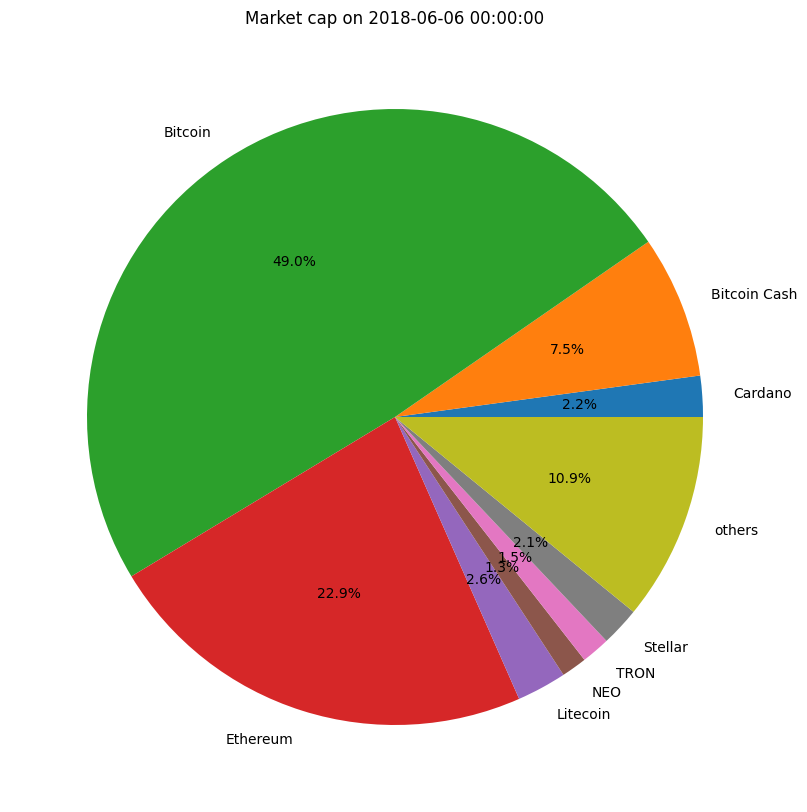

In [113]:
highest_cap = coins[coins['market'] == coins['market'].max()]
lowest_cap = coins[coins['market'] == coins['market'].min()]
print('{} has highest market cap: {} on {}'.format(highest_cap['name'].values[0], highest_cap['market'].values[0], pd.to_datetime(str(highest_cap['date'].values[0])).strftime('%Y-%m-%d')))
print('{} has lowest market cap: {} on {}'.format(lowest_cap['name'].values[0], lowest_cap['market'].values[0], pd.to_datetime(str(lowest_cap['date'].values[0])).strftime('%Y-%m-%d')))

last_day = coins['date'].max()
coins_to_plot = coins[coins['date'] == last_day]
total_cap = coins_to_plot['market'].sum()
coins_to_plot = coins_to_plot[coins_to_plot['market'] > total_cap / 100]
others = total_cap - coins_to_plot['market'].sum()
coins_to_plot = pd.concat([coins_to_plot, pd.DataFrame({'name': ['others'], 'market': [others]})])
plt.figure(figsize=(10, 10))
plt.pie(coins_to_plot['market'], labels=coins_to_plot['name'], autopct='%1.1f%%')
plt.title('Market cap on {}'.format(last_day))
# plt.savefig('market_cap.png')
plt.show()      
plt.close()

## 2. Visualization (1 point)

The most interesting part of the analyst's job is to carefully look at correctly chosen and constructed charts.

**Implement a function to visualize the prices of the selected currency for the selected date range.**

The chart should show the start and end prices of sales. As well as the minimum and maximum price for that day.
Label the graph and coordinate axes. Add a grid. Increase the image size.
You can try using `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), but you can do without it.

In [114]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    plt.figure(figsize=(10, 10))
    plt.plot(coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]['date'],
                coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]['price'])
    plt.title('Price of {} from {} to {}'.format(symbol, start_date, end_date))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]['date'][::50])
    plt.grid()
    plt.show()


Let's see what happened:

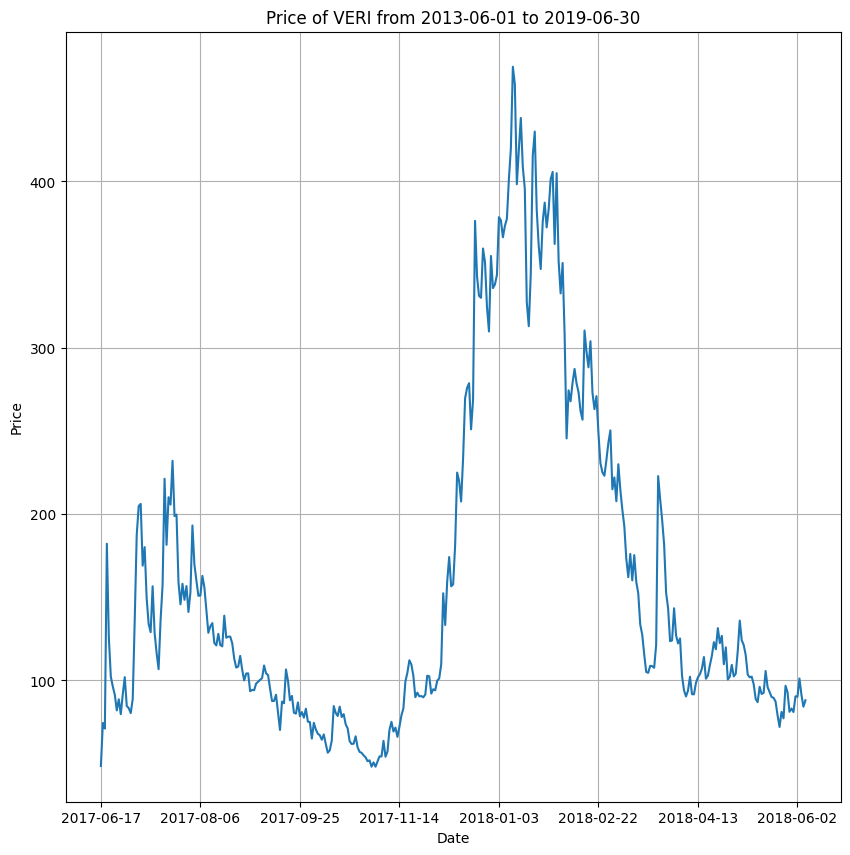

In [115]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

There is no data science in this task. It's just that an analyst should be able to build charts, or know ready-made tools.

## 3. Pump and dump (1 point)

Cryptocurrency exchanges still remain a marginal place, a kind of wild west of the financial world. As a consequence, schemes thrive here regarding
honest withdrawal of money. One of them is **pump'n'dump** (pump and dump).

She looks like this. Several large players or many small ones agree to buy together an obscure coin with a low price and trading volume. This leads to an instant rise in price (pump), then inexperienced players come in the hope of making money on such growth. At this point, the organizers of the scheme will start selling everything (dump). The whole process takes from several minutes to several hours.

Your task is to **find the strongest pump'n'dump** of the coin in the given time period. To do this, for each day, we define the number `pnd` equal to the ratio of the maximum price of the coin on the given day to the maximum of the opening and closing prices on the same day. We need to find the day when `pnd` was maximum and the value of `pnd`.

In [117]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    pnd = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)].copy()
    pnd['pnd'] = pnd['high'] / pnd[['open', 'close']].max(axis=1)
    pnd = pnd[pnd['pnd'] == pnd['pnd'].max()]
    return {'symbol': symbol, 'date': pd.to_datetime(str(pnd['date'].values[0])).strftime('%Y-%m-%d'), 'pnd': pnd['pnd'].values[0]}


In [118]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

{'symbol': 'BTC', 'date': '2017-11-29', 'pnd': 1.1428940004366206}

Compare these values ​​for different coins:

In [119]:
print(find_most_severe_pump_and_dump(coins, symbol='ETH', start_date='2017-06-01', end_date='2018-06-01'))
print(find_most_severe_pump_and_dump(coins, symbol='USDT', start_date='2017-06-01', end_date='2018-06-01'))
print(find_most_severe_pump_and_dump(coins, symbol='BCH', start_date='2017-06-01', end_date='2018-06-01'))

{'symbol': 'ETH', 'date': '2017-07-18', 'pnd': 1.1433508255471652}
{'symbol': 'USDT', 'date': '2017-11-12', 'pnd': 1.099009900990099}
{'symbol': 'BCH', 'date': '2017-11-12', 'pnd': 1.783945106058206}


## 4. ROI (1 point)

You need to calculate **return on investment (ROI)** in cryptocurrencies over a given period of time.

Payback is defined as the ratio of *portfolio price change* to *portfolio initial price*. The portfolio price is the total value (in USD) of all coins in the portfolio.

`investments` is a dictionary where the keys are the names of the coins, the values ​​are the amount of investments in this coin (in USD).

In [23]:
def compute_roi(coins, investments, start_date, end_date):
    roi = 0
    price_start = sum(investments.values())
    price_end = 0
    for (coin, amount) in investments.items():
        coin_amount = amount / coins[(coins['symbol'] == coin) & (coins['date'] == start_date)]['price'].values[0]
        price_end += coin_amount * coins[(coins['symbol'] == coin) & (coins['date'] == end_date)]['price'].values[0]
        # print(f'{coin} amount: {coin_amount} start price: {coins[(coins["symbol"] == coin) & (coins["date"] == start_date)]["price"].values[0]} end price: {coins[(coins["symbol"] == coin) & (coins["date"] == end_date)]["price"].values[0]}')
    roi = (price_end - price_start) / price_start
    return roi

In [24]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [25]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Technical analysis (1 point)

**Technical analysis** is a way to predict the behavior of a chart based on some auxiliary values ​​built on the original chart. One of the simplest methods of technical analysis is **[Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Someone believes that the graph touching the border should be reflected from it.

Borders are considered very simply:

$$(MA \pm K\sigma),$$

where `MA` is the `N` day moving average and $\sigma$ is the `N` day moving standard deviation.

Draw **price chart**, **moving average** and **Bollinger bands** with parameters `N (window) = 21`, `K (width) = 2`.

The `rolling` function will help you here to calculate the mean and standard deviation over a sliding window.

Don't forget to label the graph and axes, draw the legend and choose the best location for it.

In [76]:
def plot_bollinger_bands(coins, symbol, window, width):
    plt.figure(figsize=(10, 10))
    plt.plot(coins[coins['symbol'] == symbol]['date'], coins[coins['symbol'] == symbol]['price'], label = 'price')
    plt.plot(coins[coins['symbol'] == symbol]['date'], coins[coins['symbol'] == symbol]['price'].rolling(window=window).mean(), label = 'moving average')
    plt.plot(coins[coins['symbol'] == symbol]['date'], coins[coins['symbol'] == symbol]['price'].rolling(window=window).mean() + width * coins[coins['symbol'] == symbol]['price'].rolling(window=window).std(), label = 'upper band')
    plt.plot(coins[coins['symbol'] == symbol]['date'], coins[coins['symbol'] == symbol]['price'].rolling(window=window).mean() - width * coins[coins['symbol'] == symbol]['price'].rolling(window=window).std(), label = 'lower band')
    plt.fill_between(coins[coins['symbol'] == symbol]['date'], 
                        coins[coins['symbol'] == symbol]['price'].rolling(window=window).mean() + width * coins[coins['symbol'] == symbol]['price'].rolling(window=window).std(),
                        coins[coins['symbol'] == symbol]['price'].rolling(window=window).mean() - width * coins[coins['symbol'] == symbol]['price'].rolling(window=window).std(),
                        alpha=0.2)
    plt.title('Bollinger bands for {}'.format(symbol, window, width))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(coins[coins['symbol'] == symbol]['date'][::50])
    plt.legend()
    plt.grid()
    plt.show()

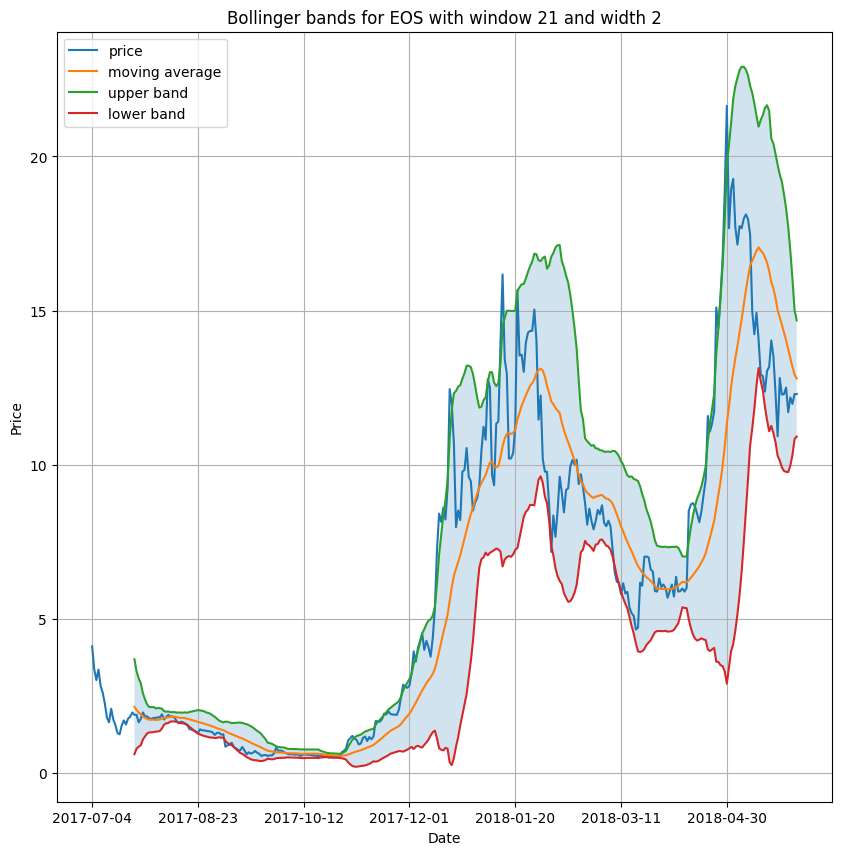

In [27]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Conclude whether the Bollinger Rule was followed:**

The fact that the lower bound is almost never crossed and the upper bound is often exceeded indicates that the market for this coin is often overextended (overbought). After the end of 2017, the distance between the two bounds is large, indicating a highly volatile market.On the other hand, a price that hits the upper boundary several times may indicate a significant level of pressure.

## 6. Capitalization as an indicator (1 point)

Many people who trade cryptocurrencies like to look at [capitalization](https://academy.binance.com/en/articles/crypto-market-capitalization-explained). Let's understand why.

**Draw two more graphs:**
1. total capitalization of bitcoin (BTC), ether (ETH), eos (EOS), bitcoin cash (BCH), stellar (XLM) and litecoin (LTC)
2. shares of capitalizations of these coins from the total market capitalization.

In this case, use the data starting from 2017-07-01.

In [28]:
def plot_coins_capitalizations(coins, symbols, start_date):
    for symbol in symbols:
        plt.plot(coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date)]['date'],
                    coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date)]['market'], label=symbol)
    plt.title('Capitalization from {}'.format(start_date))
    plt.xlabel('Date')
    plt.ylabel('Capitalization')
    plt.xticks(coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date)]['date'][::100])
    plt.grid()
    plt.legend()
    plt.show()

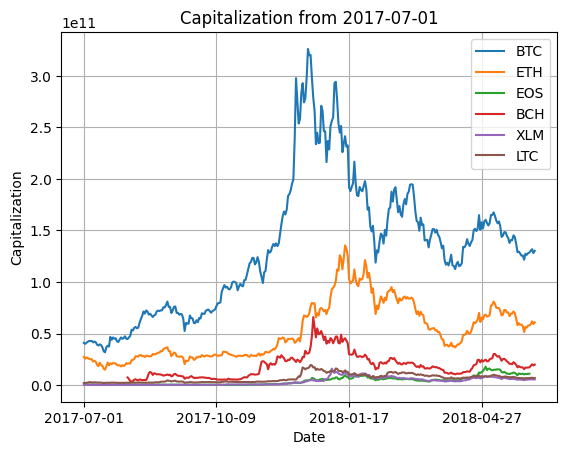

In [29]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Analyze the dependence of the share of capitalization of altcoins (other coins, except for bitcoin) on the share of capitalization of bitcoin. What do you think is the reason for this dependence?

Overall, the market cap of altcoins will change in the same way as the market cap of Bitcoin.

Altcoins are built on top of the same underlying technology as Bitcoin, which is called the blockchain. This means that they use a decentralized network of computers to verify and record transactions, just like Bitcoin.
Bitcoin is the most well-known and widely used cryptocurrency, and it is seen as a benchmark for the overall health and stability of the cryptocurrency market. As such, the price of many altcoins tends to follow the price of Bitcoin to some extent.
Additionally, many altcoins can be traded for Bitcoin on cryptocurrency exchanges, which can also contribute to their price being linked to Bitcoin. Or rather, bitcoin is sometimes used as a benchmark currency.

## 7. Coin correlations (1 point)

Now we need to take a closer look at the correlations of the average shares of coin capitalizations. In this case, we will look at the average smoothed over the last `window` days until the day `date` with a smoothing coefficient `alpha` for the set of coins `symbols`.

Implement a function that will return a square `DataFrame` with the number of rows and columns equal to the number of coins in question and with correlation values:

In [120]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    corr = pd.DataFrame()
    date_minus_window = pd.to_datetime(date) - pd.DateOffset(days=window)
    for symbol in symbols:
        corr[symbol] = coins[(coins['symbol'] == symbol) & (coins['date'] >= date_minus_window) & (coins['date'] <= date)]['market'].ewm(alpha=alpha).mean()
    corr = corr.corr()
    return corr

In [121]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6244\3415760175.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,1.00,0.71,0.99,0.98,1.00,0.98
ETH,1.00,1.00,0.72,0.98,0.96,1.00,0.98
EOS,0.71,0.72,1.00,0.62,0.60,0.68,0.66
BCH,0.99,0.98,0.62,1.00,1.00,0.99,0.99
XLM,0.98,0.96,0.60,1.00,1.00,0.98,0.99
LTC,1.00,1.00,0.68,0.99,0.98,1.00,0.99
ADA,0.98,0.98,0.66,0.99,0.99,0.99,1.00


It is quite interesting to take another look at 2017-12-27:

In [122]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6244\925846226.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.68,0.61,0.41,0.65,0.78,0.54
ETH,0.68,1.00,0.99,0.91,0.97,0.98,0.96
EOS,0.61,0.99,1.00,0.95,0.99,0.94,0.99
BCH,0.41,0.91,0.95,1.00,0.94,0.82,0.97
XLM,0.65,0.97,0.99,0.94,1.00,0.93,0.99
LTC,0.78,0.98,0.94,0.82,0.93,1.00,0.89
ADA,0.54,0.96,0.99,0.97,0.99,0.89,1.00


## 8. Analysis of one strategy (2 points)

Let's take a dreamy example. Let's see how much profit a textbook trading strategy based on moving averages could bring us.

The strategy looks like this: we build two moving averages for the price chart. With a small window (leading moving average) and with a large window (lagging moving average). **We buy when the leading average becomes larger than the lagging one and sell otherwise.**

Let's look at an example:

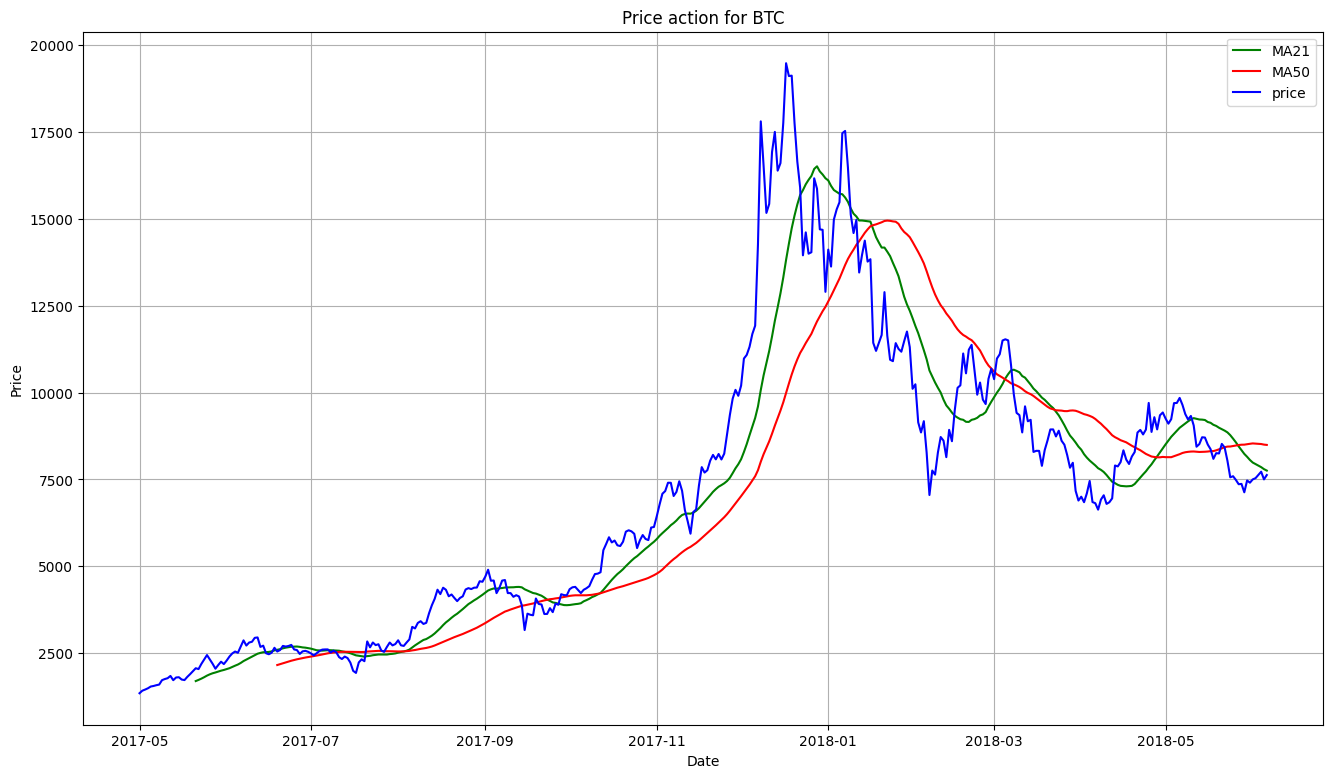

In [123]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

It can be seen that the moving average with a larger window reacts more slowly to price changes. It is on this idea that the trading strategy is based.


**Implement a function** that draws two graphs. The right side will display the price and moving averages. On the left - how many times the size of investments will change when using our strategy and with ordinary investment (we bought and hold, we look at how the price of our purchased currencies grows).

>**Notes:**
>- Let's use only closing prices. In this case, to find out the prices for yesterday, you should use the `shift (1)` method for `Series`.
>- The ratio of closing prices for today and yesterday is **multiplier** for today. At the same time, let's build accumulation graphs for multipliers. Those. if we look at 3 days and on the first day multiplier = 1.5, on the second - 0.5 and on the third - 2, then the graph will look like this: (1.5, 1.5 *0.5, 1.5* 0.5 * 2).
>- When using our new strategy, we will either buy if the leading average becomes larger than the lagging one by some `threshold` (in this case, it is better to divide the difference by the price first), or leave everything as it is. At the same time, of course, when making decisions for today, you need to look only at statistics from the past.

In [124]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    plt.figure(figsize=(15, 9))
    plt.subplot(2, 1, 1)
    plt.title('Price of {}'.format(symbol))
    plt.plot(coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]['date'],
                coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]['price'], label='price')
    plt.plot(coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]['date'],
                coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]['price'].rolling(window=lead_window).mean(), label='MA{}'.format(lead_window))
    plt.plot(coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]['date'],
                coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]['price'].rolling(window=lag_window).mean(), label='MA{}'.format(lag_window))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    

In [34]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Try different parameter values ​​for different coins and draw conclusions about the applicability of such a model:

If the price goes up above the MA lines, the probability is that it will go up, and if it goes down, it may go down.

## 9. Disclaimer

All examples of the strategies analyzed here are toys and are not suitable for real trading on the stock exchange. Without serious preparation, you will be eaten there with giblets.